In [1]:
import seaborn as sns
sns.__version__

'0.11.2'

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
plt.style.use('default')
%matplotlib inline
%reload_ext autoreload
%autoreload 

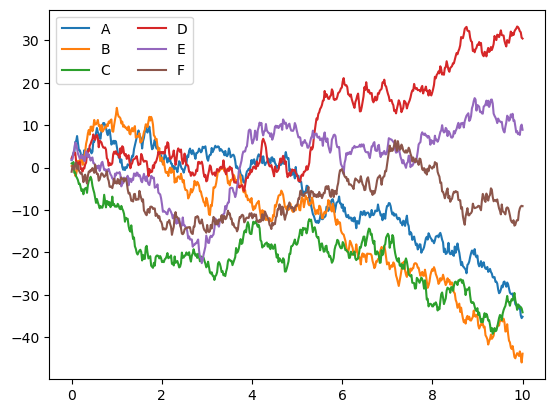

In [3]:
rng = np.random.RandomState(0)
x = np.linspace(0, 10, 500)
y = np.cumsum(rng.randn(500, 6), 0) #6 series, 500 numbers 
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left') ## Plot the data with Matplotlib defaults

seaborn vs matplotlib

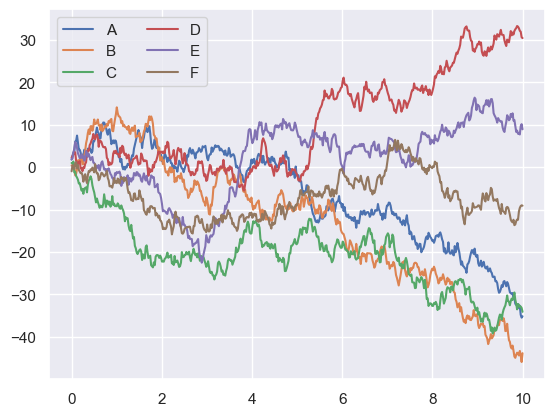

In [4]:
import seaborn as sns 
sns.set() # set style
# Plot the data with seaborn defaults (same code)
plt.plot(x, y)
plt.legend('ABCDEF', ncol=2, loc='upper left')

 Seaborn datasets

In [5]:
print(sns.get_dataset_names())


['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [6]:
exercise = sns.load_dataset('exercise')
exercise.head()

,Unnamed: 0,id,diet,pulse,time,kind
0,0,1,low fat,85,1 min,rest
1,1,1,low fat,85,15 min,rest
2,2,1,low fat,88,30 min,rest
3,3,2,low fat,90,1 min,rest
4,4,2,low fat,92,15 min,rest


<AxesSubplot:xlabel='pulse', ylabel='Count'>

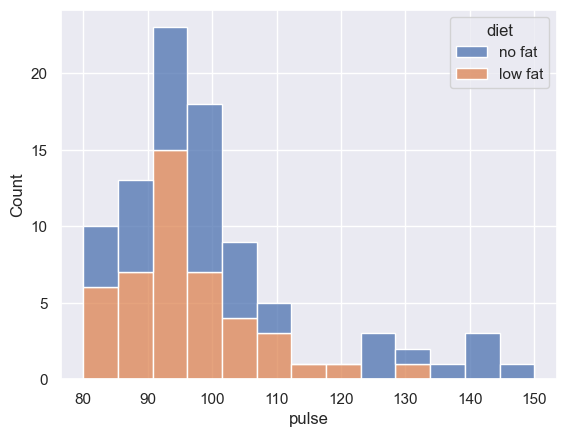

In [7]:
sns.histplot(data=exercise, x='pulse', hue='diet', multiple='stack')

<AxesSubplot:xlabel='pulse', ylabel='Density'>

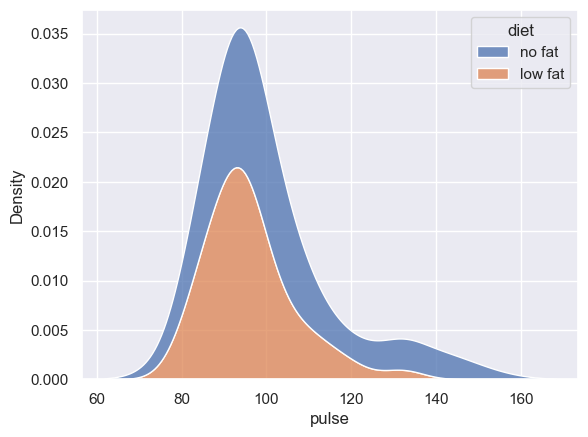

In [8]:
sns.kdeplot(data=exercise, x='pulse', hue='diet', multiple='stack')

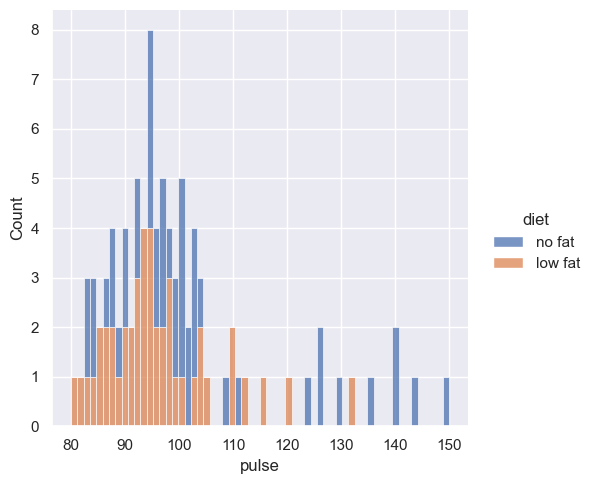

In [9]:
sns.displot(data=exercise, x='pulse', hue='diet', multiple='stack', kind='hist', bins = 60)

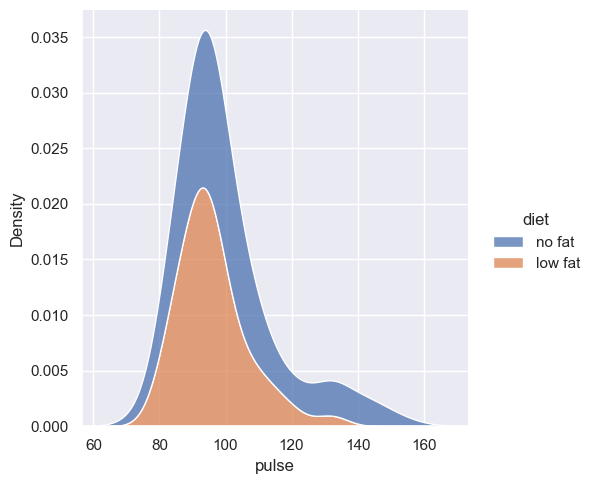

In [10]:
sns.displot(data=exercise, x='pulse', hue='diet', multiple='stack', kind='kde')

In [11]:
print(sns.get_dataset_names())



['anagrams', 'anscombe', 'attention', 'brain_networks', 'car_crashes', 'diamonds', 'dots', 'dowjones', 'exercise', 'flights', 'fmri', 'geyser', 'glue', 'healthexp', 'iris', 'mpg', 'penguins', 'planets', 'seaice', 'taxis', 'tips', 'titanic']


In [12]:
diamonds = sns.load_dataset('diamonds')
diamonds.head()

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


<AxesSubplot:xlabel='table', ylabel='Count'>

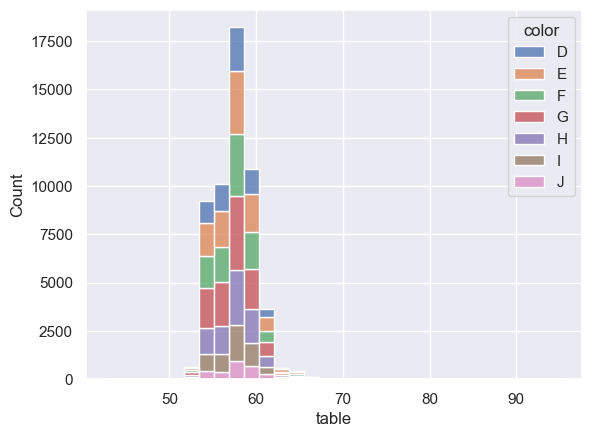

In [13]:
sns.histplot(data=diamonds, x='table', hue='color', multiple='stack', bins = 30)

seaborn structure 

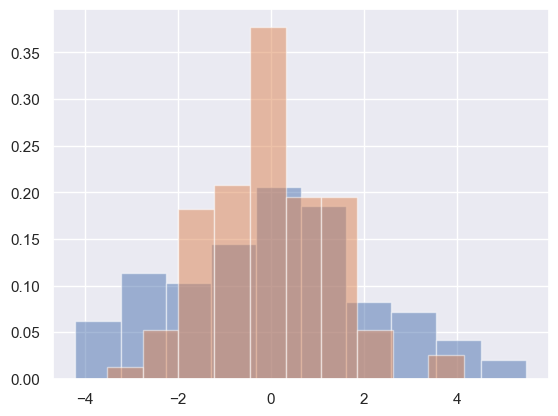

In [14]:
mean = [0, 0]
cov = [[5, 2],[2, 2]]
data=np.random.multivariate_normal(mean, cov, size=100)
data = pd.DataFrame(data, columns=['x', 'y'])
for col in 'xy':
  plt.hist(data[col], density=True, stacked=True, alpha=0.5) #alfa - transparance 

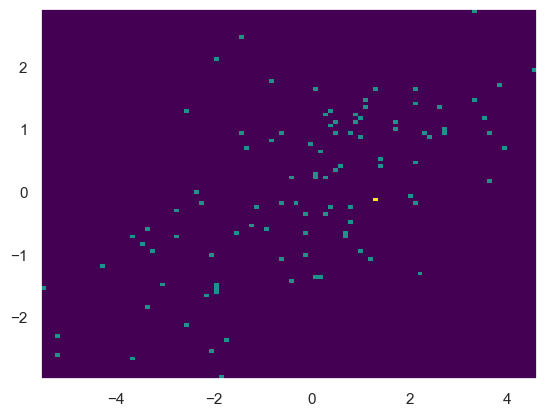

In [15]:
mean = [0, 0]
cov = [[5, 2],[2, 2]]
data=np.random.multivariate_normal(mean, cov, size=100)
data = pd.DataFrame(data, columns=['x', 'y'])
h = plt.hist2d(x=data['x'], y=data['y'], bins=100, cmap='viridis')

Histograms, KDEs, and densities kdeplots

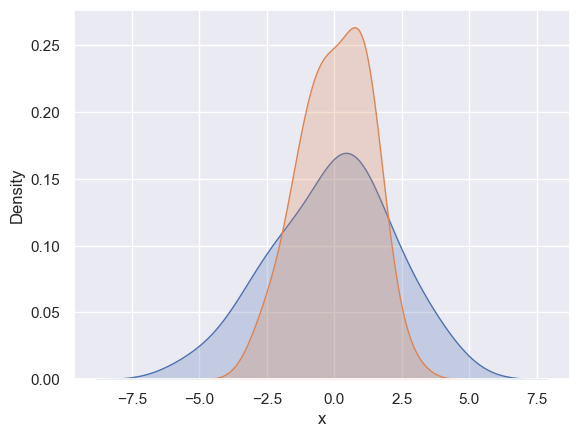

In [16]:
for col in 'xy': sns.kdeplot(data[col], shade=True, bw_method=0.5)

<AxesSubplot:xlabel='x', ylabel='y'>

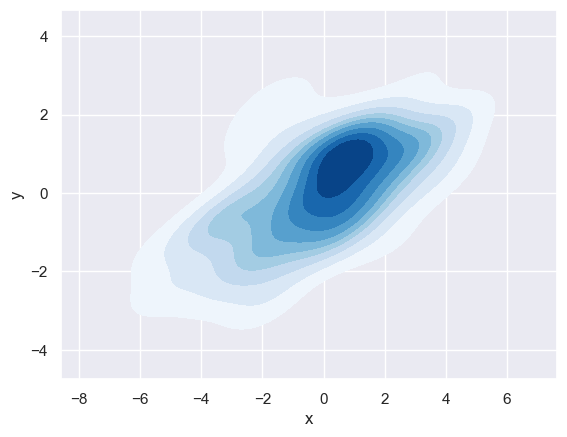

In [17]:
sns.kdeplot(x=data.x, y=data.y, shade=True, cmap="Blues", thresh=0.05)

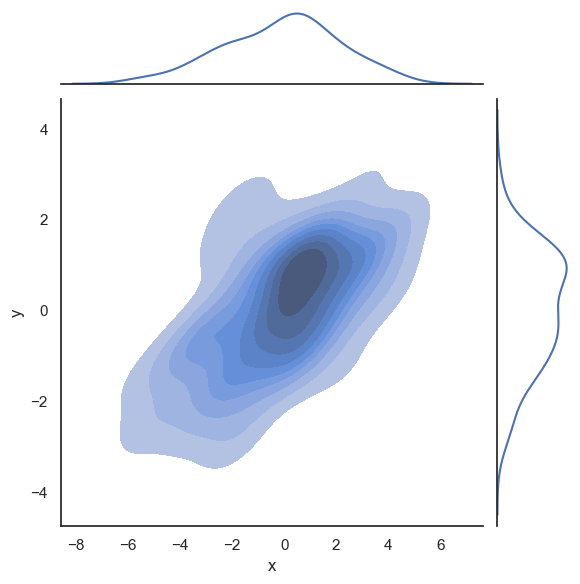

In [18]:
with sns.axes_style('white'):
 sns.jointplot(x=data.x, y=data.y, kind='kde', shade=True) 
 #sns.jointplot(x=data.x, y=data.y, data , kind='hex')

 Pair plots

In [19]:
iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


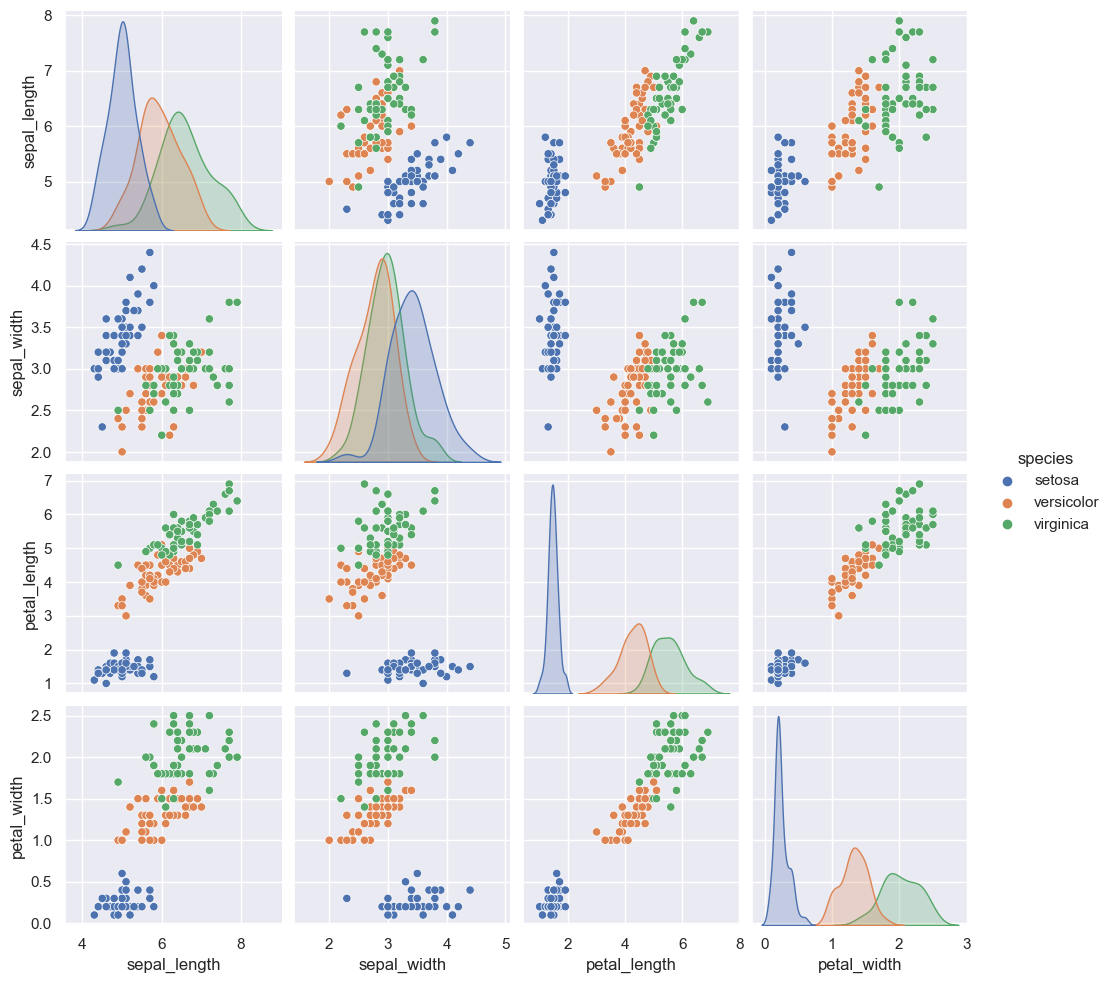

In [20]:
sns.pairplot(iris, hue='species', height=2.5)

In [21]:
tips = sns.load_dataset('tips')
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


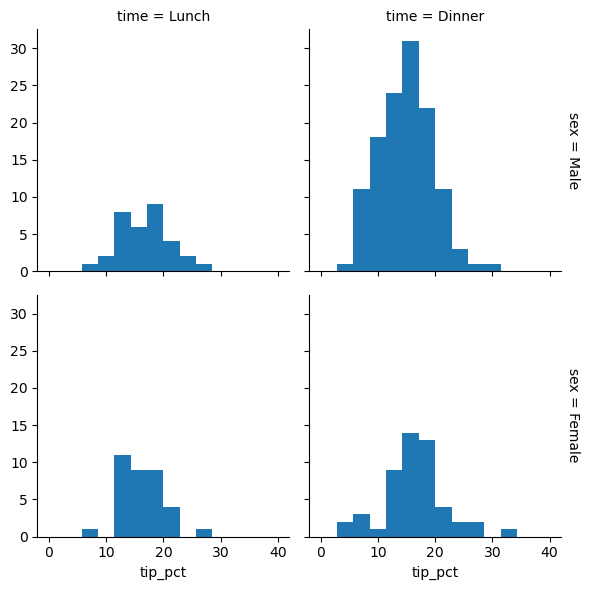

In [22]:
plt.style.use('default')
tips['tip_pct'] = 100 * tips['tip'] / tips['total_bill']
grid = sns.FacetGrid(tips, row='sex', col='time', margin_titles=True)
grid.map(plt.hist, 'tip_pct', bins=np.linspace(0,40, 15))

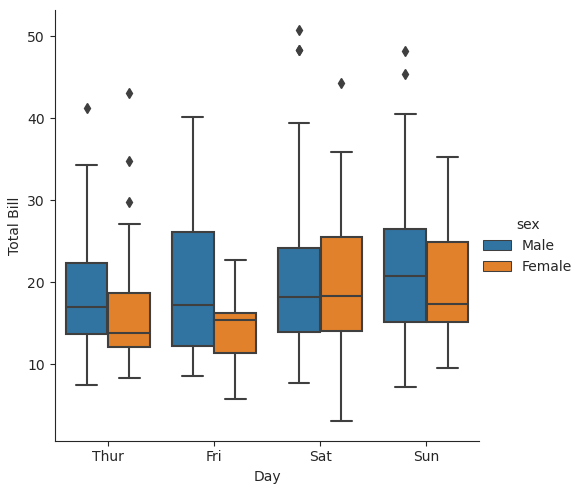

In [23]:
with sns.axes_style(style='ticks'): g=sns.catplot(x='day', y='total_bill', hue='sex', data=tips, kind='box')
g.set_axis_labels('Day', 'Total Bill')

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

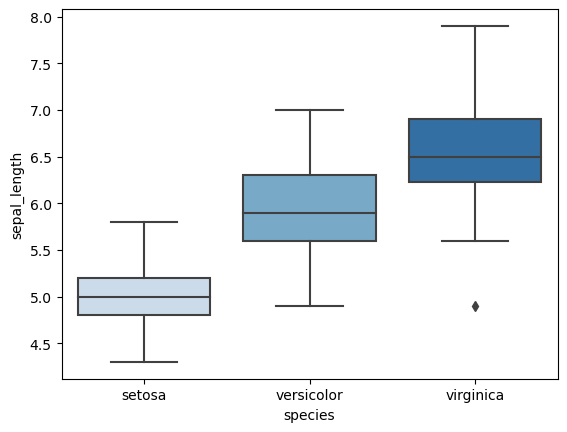

In [24]:
sns.boxplot(x='species', y='sepal_length',
palette='Blues', data=iris)

<AxesSubplot:xlabel='species', ylabel='sepal_length'>

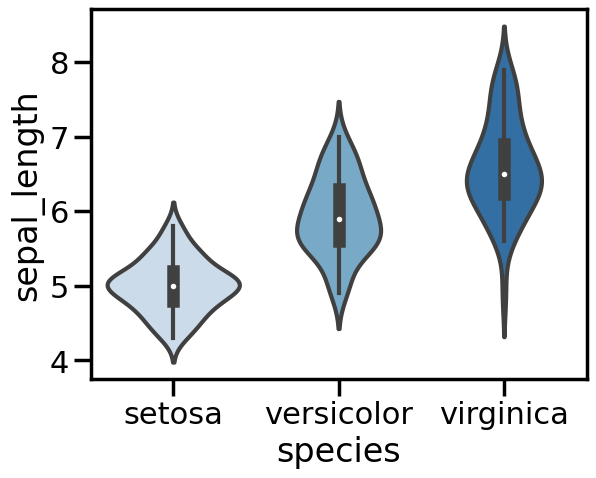

In [25]:
sns.set_context('poster')
sns.violinplot(x='species', y='sepal_length',
palette='Blues', data=iris)



<AxesSubplot:xlabel='species', ylabel='sepal_length'>

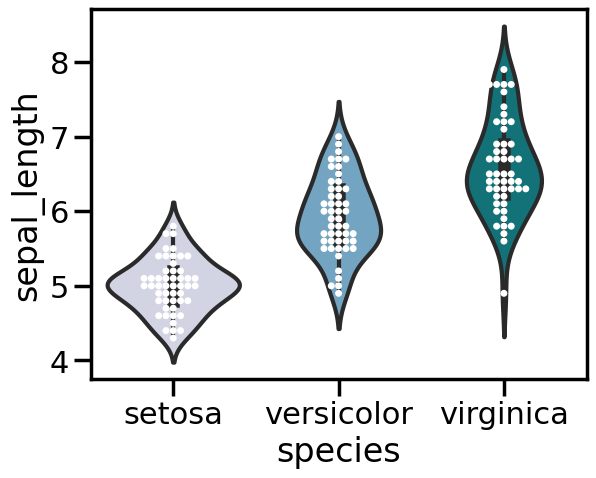

In [26]:
sns.violinplot(x='species', y='sepal_length',
palette='PuBuGn', data=iris)
sns.swarmplot(x='species', y='sepal_length',
color='White', data=iris)

28.12.2022
Matrix plots

              sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000


<AxesSubplot:>

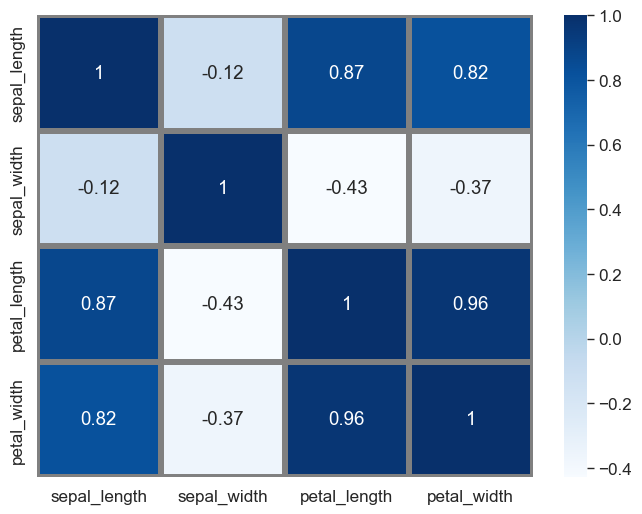

In [29]:
iris_mat = iris.corr(method='pearson') # kendall, spearman 
print(iris_mat)
plt.figure(figsize=(8,6))
sns.set_style('white')
sns.set_context('paper', font_scale=1.4);
sns.heatmap(iris_mat, annot=True, cmap='Blues',linecolor='grey', linewidth=3)

Cluster maps

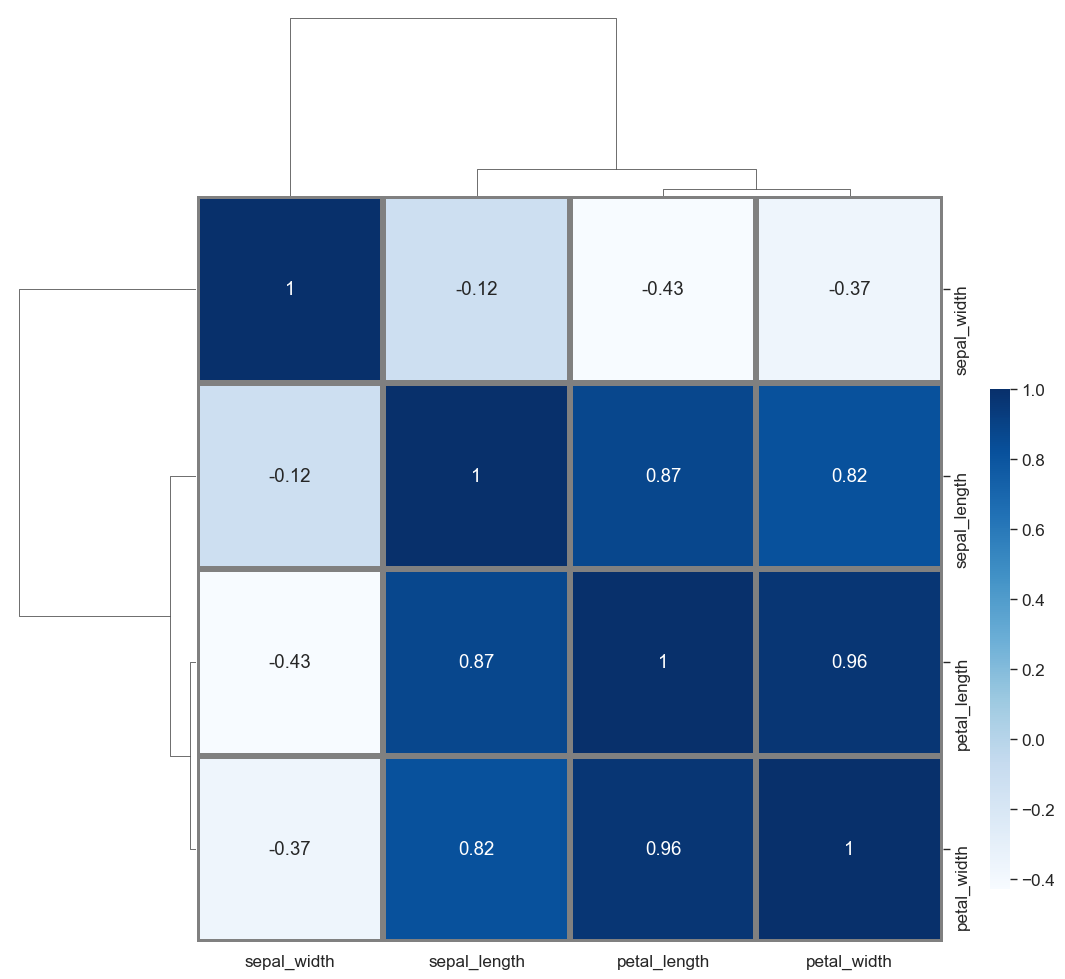

In [30]:
g = sns.clustermap(iris_mat, annot=True, cmap='Blues', linecolor='grey', linewidth=3)
g.ax_cbar.set_position((1.0, 0.1, 0.02, 0.5))

 PairGrid

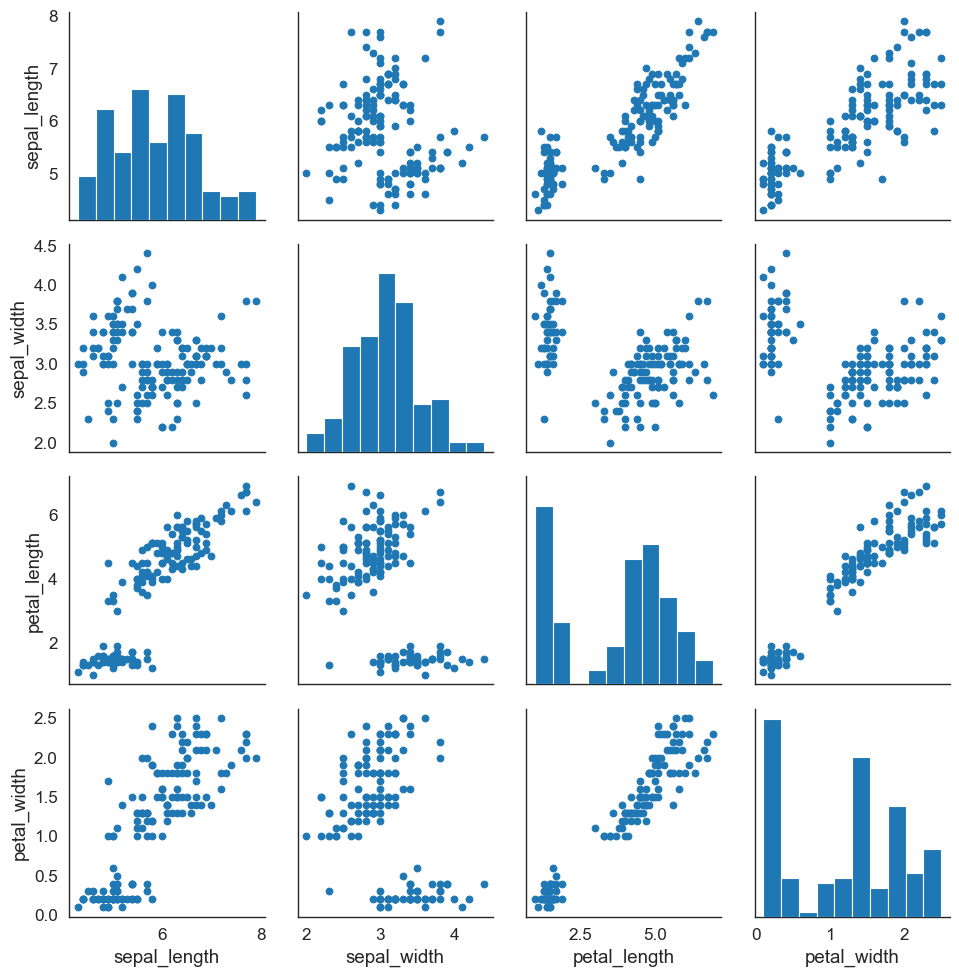

In [32]:
iris_g = sns.PairGrid(iris)
iris_g.map_offdiag(plt.scatter)
iris_g.map_diag(plt.hist)

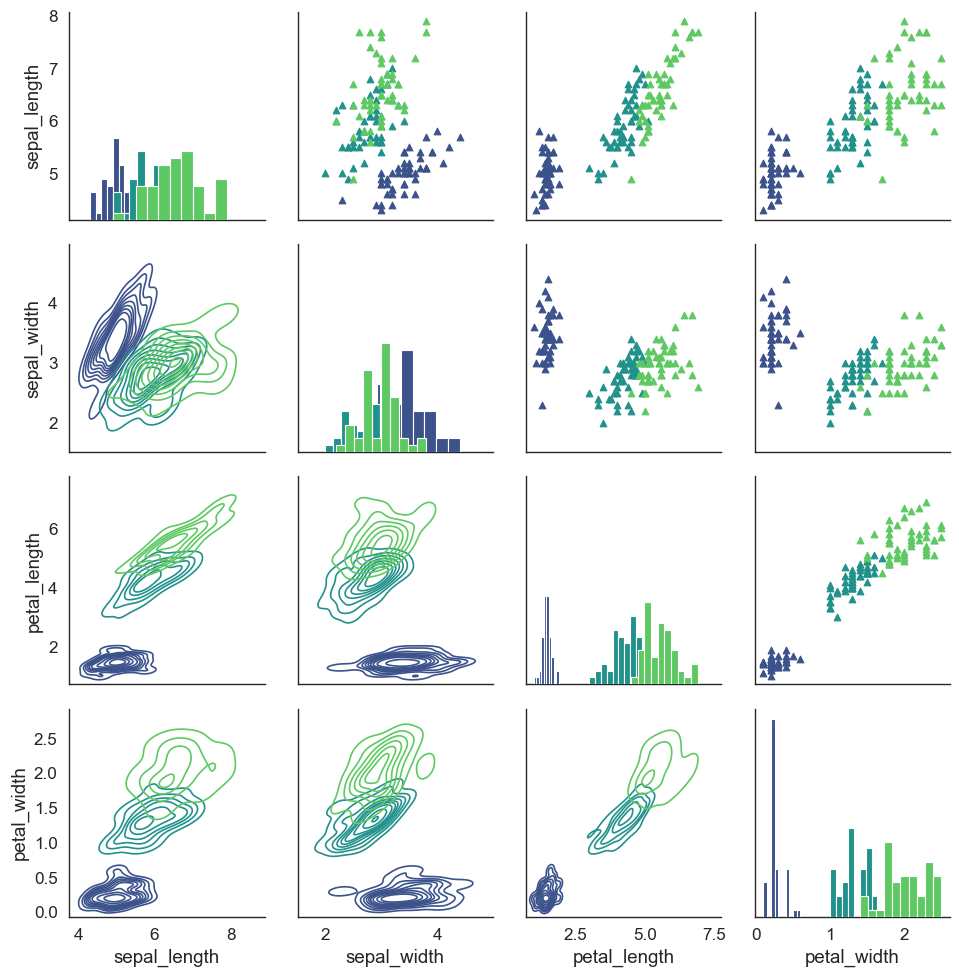

In [31]:
iris_g = sns.PairGrid(iris, hue='species', palette='viridis')
iris_g.map_diag(plt.hist)
iris_g.map_upper(plt.scatter, marker='^')
iris_g.map_lower(sns.kdeplot)

 Simple Regression plots

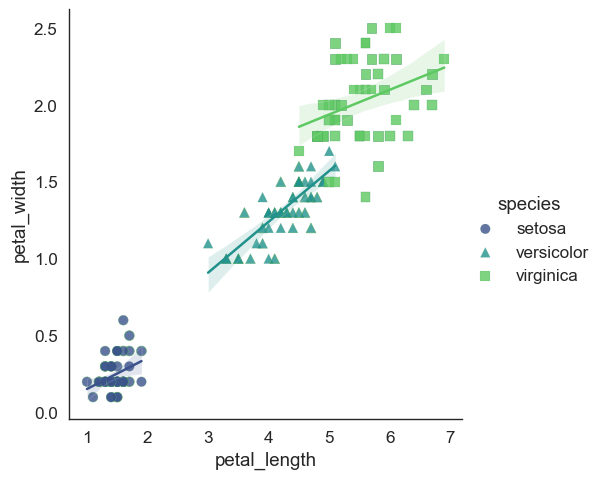

In [34]:
sns.lmplot(data=iris, hue='species', palette='viridis', x='petal_length', y='petal_width', markers=['o', '^', 's'], scatter_kws={'s': 50, 'linewidth':[0.1, 0.3, 0.5], 'edgecolor':'g'})

In [35]:
iris_st = iris[iris['species']=='setosa']
iris_vr = iris[iris['species']=='virginica']
iris_vc = iris[iris['species']=='versicolor']

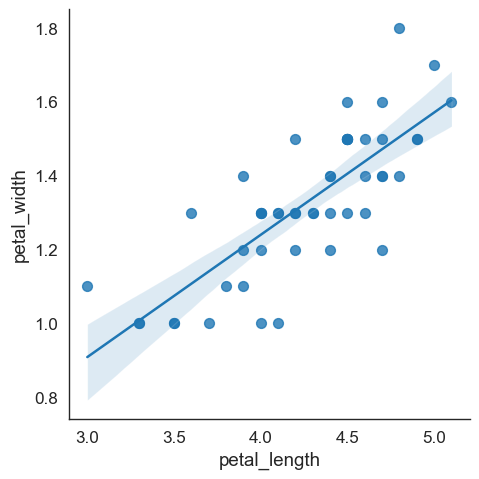

In [36]:
sns.lmplot(x='petal_length', y='petal_width', data=iris_vc, markers=['o'], scatter_kws={'s': 50})

<AxesSubplot:xlabel='petal_length', ylabel='petal_width'>

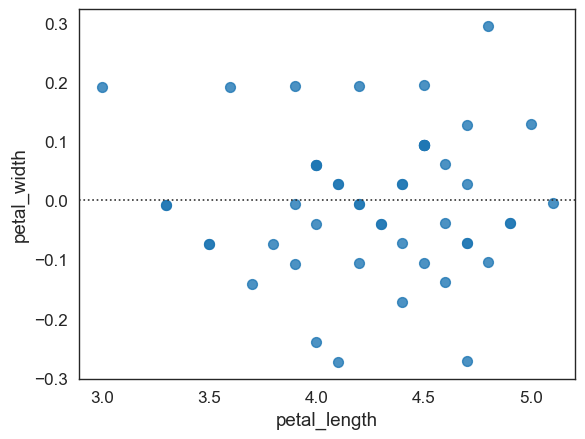

In [37]:
sns.residplot(x='petal_length', y='petal_width', data=iris_vc, scatter_kws={'s': 50})